In [1]:
import sys
print("Python Version")
print(sys.version)

Python Version
3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


In [2]:
#%matplotlib ipympl
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.set_printoptions(suppress=True)

In [4]:
import imageio

In [5]:
import math

In [6]:
terrain = imageio.imread("bw_map_50px.png")

In [7]:
from importlib import reload

In [8]:
import lib

In [23]:
reload(lib)

<module 'lib' from '/home/xaedes/screeps-python2/jupyterlab/lib.py'>

In [24]:
num_points = 10
points = lib.rand_points(terrain, num_points)

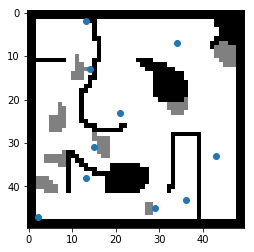

In [25]:
plt.imshow(terrain,cmap=plt.cm.gray)
plt.plot(points[:,0],points[:,1],"o")

In [26]:
terrain_costs = lib.map_terrain_costs(terrain, {128:1,255:1})

In [27]:
cost_maps = np.array([
    lib.compute_cost_map(terrain_costs, point)
    for point in points
])

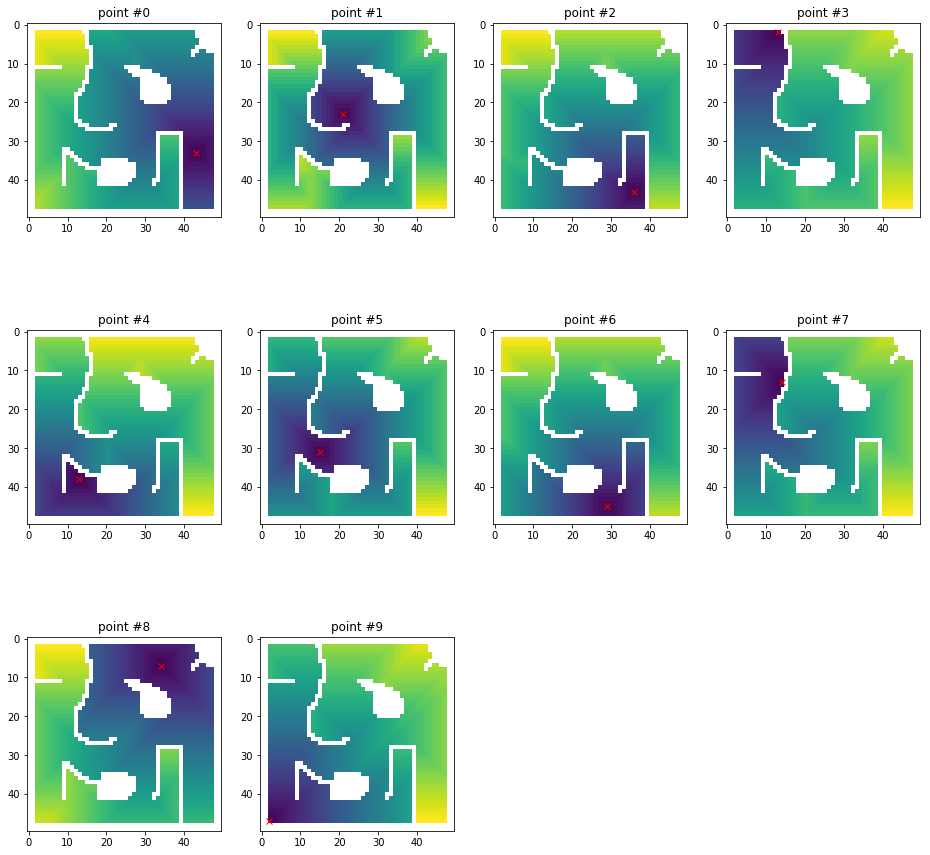

In [28]:
subplot_w = int(math.ceil(math.sqrt(len(points))))
subplot_h = int(math.ceil(len(points)/subplot_w))
plt.figure(figsize=(16,16))

for k,(cost, point) in enumerate(zip(cost_maps, points)):
    plt.subplot(subplot_h, subplot_w, 1+k)
    plt.title("point #%d" % k)
    plt.imshow(cost)
    plt.plot(point[0],point[1],"x",color="red")


In [29]:
voronoi = lib.compute_voronoi(cost_maps)

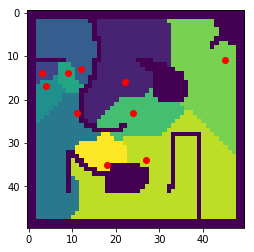

In [22]:
plt.imshow(voronoi)
plt.plot(points[:,0],points[:,1],"o",color="red")

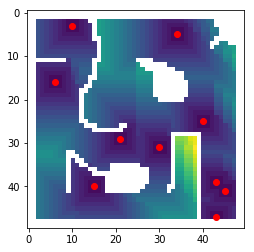

In [410]:
plt.imshow(cost_maps.min(axis=0))
plt.plot(points[:,0],points[:,1],"o",color="red")

In [411]:
voronoi_neighbors = lib.comute_voronoi_neighbors(voronoi)

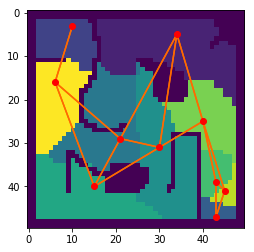

In [426]:
plt.imshow(voronoi)
for k,idcs in voronoi_neighbors.items():
    for i in idcs:
        plt.plot(
            [points[k,0],points[i,0]],
            [points[k,1],points[i,1]],
            color="#FF6A00"
        )
plt.plot(points[:,0],points[:,1],"o",color="red")


In [427]:
def path_to(cost_map start_pos, maxit = 50):
    x,y=start_pos
    neighbors = lib.neighborhood()
    k = 0
    path = [(x,y)]
    h,w = cost_map.shape
    while cost_map[x,y] > 0 and k<maxit:
        k+=1
        moves = np.array([
            (x+dx,y+dy)
            for dx,dy in neighbors 
            if ((0 <= x+dx < w)
            and (0 <= y+dy < h)
               )])
            #and (cost_map[y+dy,x+dx] <= cost_map[y,x]))]
        costs = np.array([cost_map[y_,x_] for x_,y_ in moves])
        eucl_costs = np.sqrt(np.sum(np.square(moves-(x,y)),axis=1))
        total_costs = costs+0.01*eucl_costs
        best_move = np.argmin(total_costs)
        sel_best_moves = total_costs == total_costs[best_move]
        if np.sum(sel_best_moves)>1:
            best_moves = moves[sel_best_moves]
            x,y = best_moves[np.random.randint(0,len(best_moves))]
        else:
            x,y = moves[best_move]
        path.append((x,y))
    return path

In [428]:
terrain_costs_roads = lib.map_terrain_costs(terrain, {128:2,255:1})
#terrain_costs.copy()

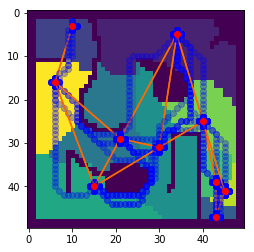

In [429]:
plt.imshow(voronoi)
for k,idcs in voronoi_neighbors.items():
    for i in idcs:
        plt.plot(
            [points[k,0],points[i,0]],
            [points[k,1],points[i,1]],
            color="#FF6A00"
        )
        path = np.array(path_to(cost_maps[i], points[k]))
        plt.plot(path[:,0],path[:,1],"o",color="blue",alpha=0.3)
        terrain_costs_roads[path[:,1],path[:,0]] *= 0.1
plt.plot(points[:,0],points[:,1],"o",color="red")



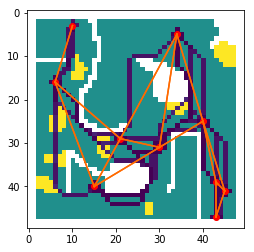

In [430]:
plt.imshow(terrain_costs_roads)
plt.plot(points[:,0],points[:,1],"o",color="red")
for k,idcs in voronoi_neighbors.items():
    for i in idcs:
        plt.plot(
            [points[k,0],points[i,0]],
            [points[k,1],points[i,1]],
            color="#FF6A00"
        )

In [431]:
cost_maps_roads = np.array([
    lib.compute_cost_map(terrain_costs_roads, point)
    for point in points
])

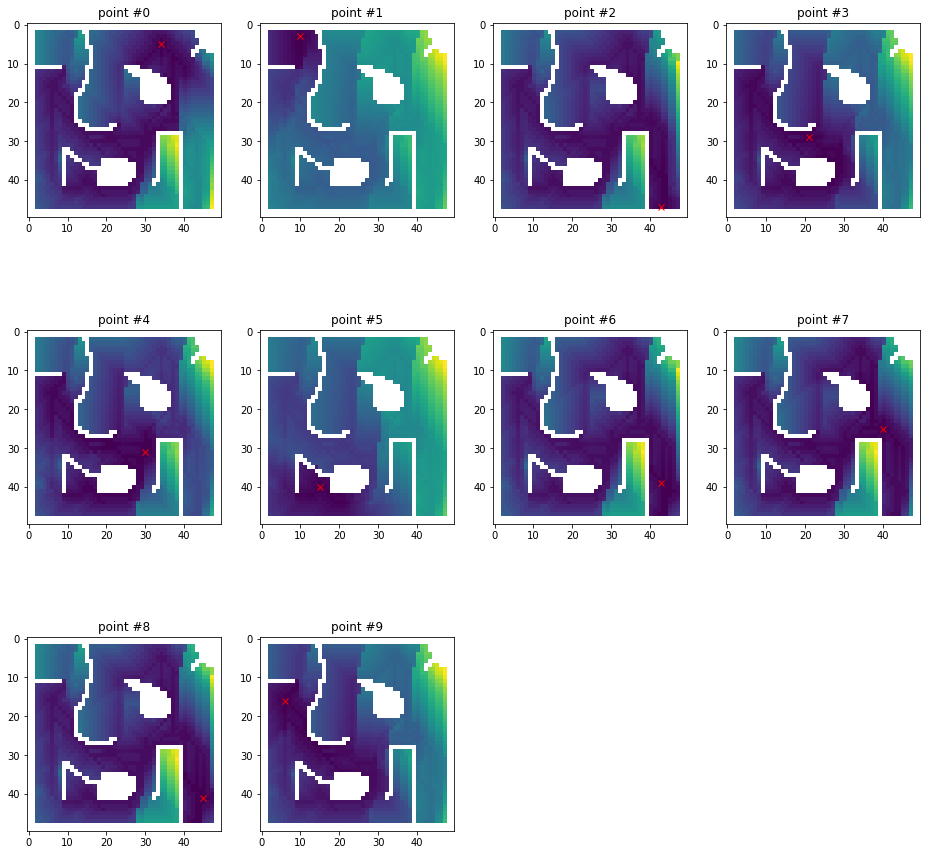

In [432]:
subplot_w = int(math.ceil(math.sqrt(len(points))))
subplot_h = int(math.ceil(len(points)/subplot_w))
plt.figure(figsize=(16,16))

for k,(cost, point) in enumerate(zip(cost_maps_roads, points)):
    plt.subplot(subplot_h, subplot_w, 1+k)
    plt.title("point #%d" % k)
    plt.imshow(cost)
    plt.plot(point[0],point[1],"x",color="red")


In [433]:
voronoi_roads = lib.compute_voronoi(cost_maps_roads)

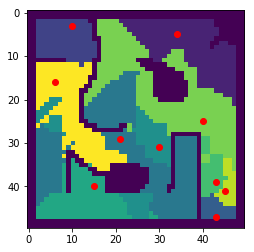

In [434]:
plt.imshow(voronoi_roads)
plt.plot(points[:,0],points[:,1],"o",color="red")

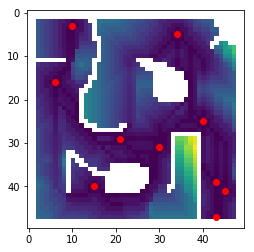

In [435]:
plt.imshow(cost_maps_roads.min(axis=0))
plt.plot(points[:,0],points[:,1],"o",color="red")

In [436]:
voronoi_neighbors_roads = lib.comute_voronoi_neighbors(voronoi_roads)

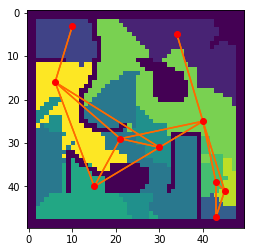

In [437]:
plt.imshow(voronoi_roads)
for k,idcs in voronoi_neighbors_roads.items():
    for i in idcs:
        plt.plot(
            [points[k,0],points[i,0]],
            [points[k,1],points[i,1]],
            color="#FF6A00"
        )
plt.plot(points[:,0],points[:,1],"o",color="red")


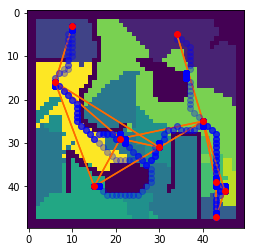

In [438]:
plt.imshow(voronoi_roads)
for k,idcs in voronoi_neighbors_roads.items():
    for i in idcs:
        plt.plot(
            [points[k,0],points[i,0]],
            [points[k,1],points[i,1]],
            color="#FF6A00"
        )
        path = np.array(path_to(cost_maps_roads[i], points[k]))
        plt.plot(path[:,0],path[:,1],"o",color="blue",alpha=0.3)
        terrain_costs_roads[path[:,1],path[:,0]] *= 0.1
plt.plot(points[:,0],points[:,1],"o",color="red")



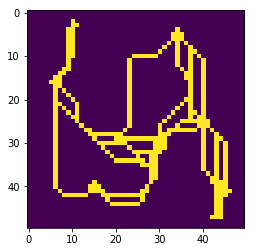

In [442]:
plt.imshow(terrain_costs_roads < 1)

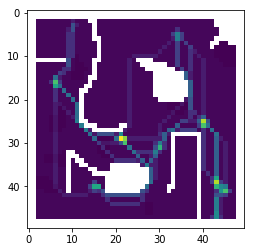

In [447]:
plt.imshow(-np.log(terrain_costs_roads))

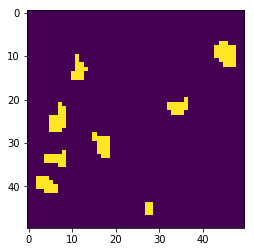

In [440]:
plt.imshow(lib.map_terrain_costs(terrain) == 2)

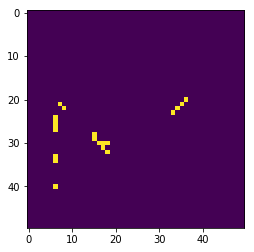

In [443]:
plt.imshow((terrain_costs_roads < 1) & (lib.map_terrain_costs(terrain) == 2))